# Análisis de Anime

In [2]:
#Importamos las librerías necesarias inicialmente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##  Lectura de datasets

El data set se ha obtenido de Kaggle: https://www.kaggle.com/datasets/tanishksharma9905/top-popular-anime

#### Detalles del Dataset

Este conjunto de datos contiene información detallada sobre las principales series y películas de anime, clasificadas en MyAnimeList, obtenido a través de la API de Jikan — una API REST no oficial para MyAnimeList.

Incluye datos de más de 1,100 páginas (más de 22,000 entradas de anime), lo que lo convierte en uno de los conjuntos de datos de anime de código abierto más completos disponibles.

id	Unique identifier (MyAnimeList ID)
name	English title of the anime (fallback to original or Japanese title)
genres	Comma-separated list of genres
type	Type of anime (e.g. TV, Movie, OVA)
episodes	Number of episodes
status	Airing status (Finished, Airing, Upcoming)
aired_from	Start date of airing
aired_to	End date of airing
duration_per_ep	Duration per episode
score	User score (rating out of 10)
scored_by	Number of users who rated it
rank	Rank on MyAnimeList
rating	Age rating (e.g., PG-13, R)
studios	Studios involved in production
producers	Producers listed
image	URL to the cover image
trailer	URL to the trailer video
synopsis	Short plot summary


In [3]:


anime = pd.read_csv('https://raw.githubusercontent.com/glandricina10/notebooks2/main/popular_anime.csv', parse_dates=['aired_from', 'aired_to'])



In [4]:
anime.head()

,id,name,genres,type,episodes,status,aired_from,aired_to,duration_per_ep,score,scored_by,rank,rating,studios,producers,image,trailer,synopsis
0,52991,Frieren: Beyond Journey's End,"Adventure, Drama, Fantasy",TV,28.0,Finished Airing,2023-09-29 00:00:00+00:00,2024-03-22 00:00:00+00:00,24 min per ep,9.30,676737.0,1.0,PG-13 - Teens 13 or older,Madhouse,"Aniplex, Dentsu, Shogakukan-Shueisha Productio...",https://cdn.myanimelist.net/images/anime/1015/...,https://www.youtube.com/watch?v=ZEkwCGJ3o7M,During their decade-long quest to defeat the D...
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy",TV,64.0,Finished Airing,2009-04-05 00:00:00+00:00,2010-07-04 00:00:00+00:00,24 min per ep,9.10,2223666.0,2.0,R - 17+ (violence & profanity),Bones,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",https://cdn.myanimelist.net/images/anime/1208/...,https://www.youtube.com/watch?v=1ac3_YdSSy0,After a horrific alchemy experiment goes wrong...
2,9253,Steins;Gate,"Drama, Sci-Fi, Suspense",TV,24.0,Finished Airing,2011-04-06 00:00:00+00:00,2011-09-14 00:00:00+00:00,24 min per ep,9.07,1467570.0,3.0,PG-13 - Teens 13 or older,White Fox,"Frontier Works, Media Factory, Kadokawa Shoten...",https://cdn.myanimelist.net/images/anime/1935/...,https://www.youtube.com/watch?v=27OZc-ku6is,Eccentric scientist Rintarou Okabe has a never...
3,38524,Attack on Titan Season 3 Part 2,"Action, Drama, Suspense",TV,10.0,Finished Airing,2019-04-29 00:00:00+00:00,2019-07-01 00:00:00+00:00,23 min per ep,9.05,1700946.0,4.0,R - 17+ (violence & profanity),Wit Studio,"Production I.G, Dentsu, Mainichi Broadcasting ...",https://cdn.myanimelist.net/images/anime/1517/...,https://www.youtube.com/watch?v=hKHepjfj5Tw,Seeking to restore humanity's diminishing hope...
4,28977,Gintama Season 4,"Action, Comedy, Sci-Fi",TV,51.0,Finished Airing,2015-04-08 00:00:00+00:00,2016-03-30 00:00:00+00:00,24 min per ep,9.05,264260.0,5.0,PG-13 - Teens 13 or older,Bandai Namco Pictures,"TV Tokyo, Aniplex, Dentsu",https://cdn.myanimelist.net/images/anime/3/720...,NaN,"Gintoki, Shinpachi, and Kagura return as the f..."


Ahora vamos a cambiar el formato de las fechas

In [5]:
anime['aired_from_year'] = anime['aired_from'].dt.year

anime['aired_to_year'] = anime['aired_to'].dt.year

In [6]:
anime.describe(include = 'all')

,id,name,genres,type,episodes,status,aired_from,aired_to,duration_per_ep,score,scored_by,rank,rating,studios,producers,image,trailer,synopsis,aired_from_year,aired_to_year
count,28825.000000,28825,22756,28738,28046.000000,28825,27870,10930,28825,18599.000000,1.859900e+04,21962.000000,28101,16936,13452,28825,5474,23457,27870.000000,10930.000000
unique,NaN,28350,935,9,NaN,3,NaN,NaN,345,NaN,NaN,NaN,6,1862,5120,28315,5344,21991,NaN,NaN
top,NaN,Spirit Guardians,Comedy,TV,NaN,Finished Airing,NaN,NaN,24 min per ep,NaN,NaN,NaN,PG-13 - Teens 13 or older,Toei Animation,NHK,https://cdn.myanimelist.net/img/sp/icon/apple-...,https://www.youtube.com/watch?v=Xf73IT2cnGE,Music video for the so,NaN,NaN
freq,NaN,5,2621,8249,NaN,27813,NaN,NaN,2078,NaN,NaN,NaN,10413,871,1158,293,4,64,NaN,NaN
mean,34131.945117,NaN,NaN,NaN,13.827462,NaN,2009-08-25 11:09:28.094725376+00:00,2011-08-31 20:10:29.752973312+00:00,NaN,6.397697,2.989163e+04,10522.959749,NaN,NaN,NaN,NaN,NaN,NaN,2009.221708,2011.144465
min,1.000000,NaN,NaN,NaN,1.000000,NaN,1917-01-01 00:00:00+00:00,1962-02-25 00:00:00+00:00,NaN,1.890000,1.010000e+02,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,1917.000000,1962.000000
25%,15979.000000,NaN,NaN,NaN,1.000000,NaN,2004-03-06 00:00:00+00:00,2006-03-24 00:00:00+00:00,NaN,5.780000,3.400000e+02,4989.250000,NaN,NaN,NaN,NaN,NaN,NaN,2004.000000,2006.000000
50%,38070.000000,NaN,NaN,NaN,2.000000,NaN,2014-01-10 00:00:00+00:00,2014-11-24 12:00:00+00:00,NaN,6.370000,1.544000e+03,10462.500000,NaN,NaN,NaN,NaN,NaN,NaN,2014.000000,2014.000000
75%,51060.000000,NaN,NaN,NaN,13.000000,NaN,2020-01-01 00:00:00+00:00,2020-03-23 00:00:00+00:00,NaN,7.030000,1.009150e+04,16022.750000,NaN,NaN,NaN,NaN,NaN,NaN,2020.000000,2020.000000
max,61871.000000,NaN,NaN,NaN,3057.000000,NaN,2027-01-01 00:00:00+00:00,2025-12-05 00:00:00+00:00,NaN,9.300000,2.943048e+06,21729.000000,NaN,NaN,NaN,NaN,NaN,NaN,2027.000000,2025.000000


#### Correcciones y limpieza del data set

Debemos asegurar que los datos contenidos en el data set son totalmente claros.Por lo que se debe primero lo que contiene el cvs, si exiten datos de poco valor o nulos o duplicidades de estos.

In [7]:
anime.status.unique()

array(['Finished Airing', 'Currently Airing', 'Not yet aired'],
      dtype=object)

#### Información del data set

In [8]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28825 entries, 0 to 28824
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   id               28825 non-null  int64              
 1   name             28825 non-null  object             
 2   genres           22756 non-null  object             
 3   type             28738 non-null  object             
 4   episodes         28046 non-null  float64            
 5   status           28825 non-null  object             
 6   aired_from       27870 non-null  datetime64[ns, UTC]
 7   aired_to         10930 non-null  datetime64[ns, UTC]
 8   duration_per_ep  28825 non-null  object             
 9   score            18599 non-null  float64            
 10  scored_by        18599 non-null  float64            
 11  rank             21962 non-null  float64            
 12  rating           28101 non-null  object             
 13  studios         

#### Valores nulos o incorrectos

Vamos a intentar remplazar los valores nulos


In [9]:
#1-Ver cuantos valors nulos hay en cada variable
anime.isnull().sum()


,0
id,0
name,0
genres,6069
type,87
episodes,779
status,0
aired_from,955
aired_to,17895
duration_per_ep,0
score,10226


In [10]:
#2- Averiguar los valores que faltan y replazarlos por 0
anime.fillna(0,inplace=True)

/tmp/ipython-input-10-3574188573.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns, UTC], please explicitly cast to a compatible dtype first.
  anime.fillna(0,inplace=True)


In [11]:
# 3- Revisar si el dataset contiene datos duplicados
sum(anime.duplicated())

218

Como podemos observar el siguiente dataset contiene 12 variables que se pueden analizar a través de una serie de preguntas que nos permita explicar mejor la informacion que contiene el dataset.

PREGUNTAS
1. Influye el género en la cantidad de compras
2. La edad como factor de influencia en la cantidad de compras
3. La categoría de la ciudad inlfuye en las compras y en los tipos de compra
4. El estado civil como factor condicional de la cantidad de compras


 # Gráfico 1: Cantidad de compras por categoría 1

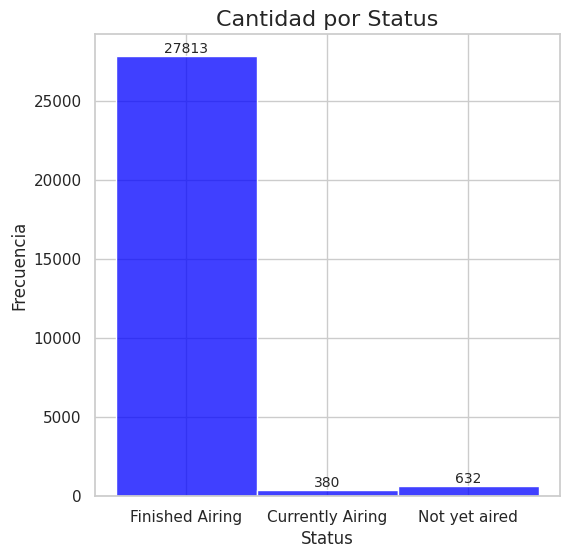

In [12]:
# Configurar estilo de gráficos
sns.set(style="whitegrid")

# --- Gráfico 1: Cantidad de compras según su frecuencia ---
plt.figure(figsize=(6, 6))
ax = sns.histplot(anime['status'], kde=False, bins=50, color='blue')

# Añadir etiquetas con el valor de cada barra
for p in ax.containers:
    for rect in p:
        height = rect.get_height()
        # Añadir etiqueta en la parte superior de cada barra
        ax.text(
            rect.get_x() + rect.get_width() / 2,  # coordenada x del centro de la barra
            height,                                # coordenada y en la altura de la barra
            f'{int(height)}',                      # texto (cantidad)
            ha='center', va='bottom', fontsize=10
        )

plt.title('Cantidad por Status', fontsize=16)
plt.xlabel('Status', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()


Analicemos cuantos programas aún siguen en el aire y ver cuales son los mas antiguos.

/tmp/ipython-input-13-2694266485.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_contar, x='Año', y='Cantidad', palette='Blues')


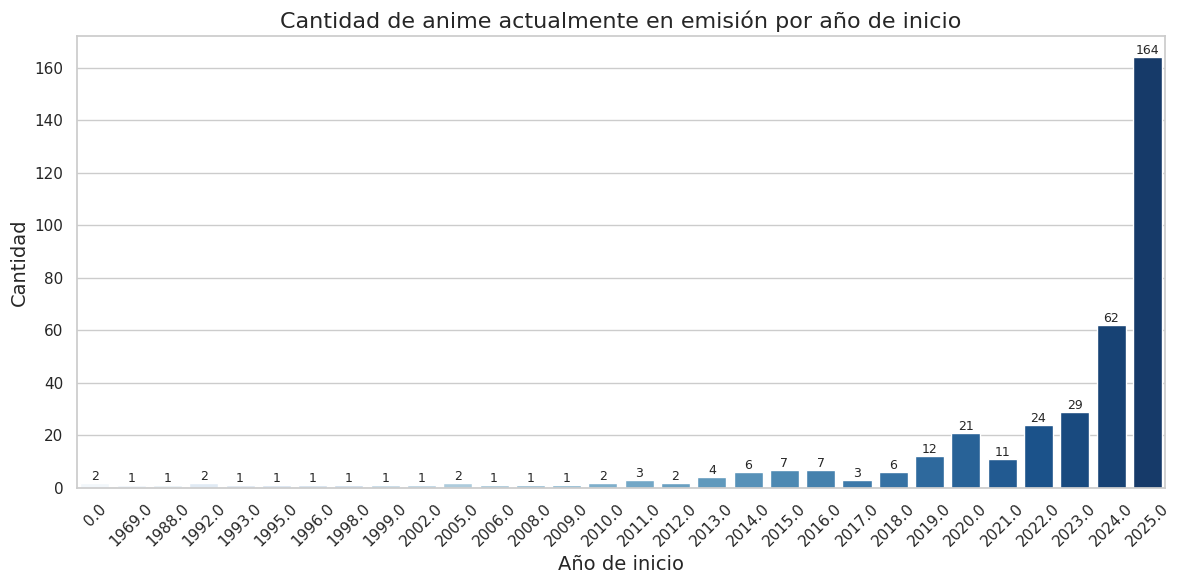

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filtrar los datos por estado "Currently Airing"
currently_airing = anime[anime['status'] == 'Currently Airing']

# Contar la cantidad de anime por año de "aired_from_year"
contar_por_year = currently_airing['aired_from_year'].value_counts().sort_index()

# Crear un DataFrame para mejor manejo en seaborn
df_contar = contar_por_year.reset_index()
df_contar.columns = ['Año', 'Cantidad']

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_contar, x='Año', y='Cantidad', palette='Blues')

# Agregar cantidad en cada barra
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Cantidad de anime actualmente en emisión por año de inicio', fontsize=16)
plt.xlabel('Año de inicio', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/tmp/ipython-input-14-1887718217.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_contar, x='Año', y='Cantidad', palette='Blues')


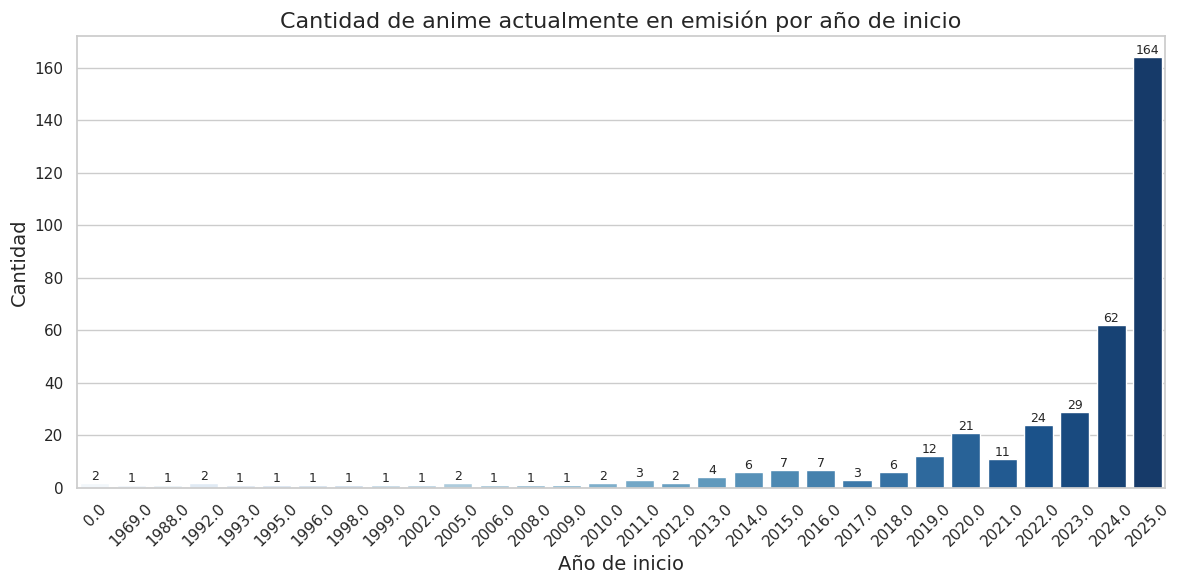

In [14]:
# Filtrar los datos por estado "Currently Airing"
currently_airing = anime[anime['status'] == 'Currently Airing']

# Contar la cantidad de anime por año de "aired_from_year"
contar_por_year = currently_airing['aired_from_year'].value_counts().sort_index()

# Crear un DataFrame para mejor manejo en seaborn
df_contar = contar_por_year.reset_index()
df_contar.columns = ['Año', 'Cantidad']

# Gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=df_contar, x='Año', y='Cantidad', palette='Blues')

# Agregar cantidad en cada barra
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(
        p.get_x() + p.get_width() / 2,
        height,
        f'{int(height)}',
        ha='center',
        va='bottom',
        fontsize=9
    )

plt.title('Cantidad de anime actualmente en emisión por año de inicio', fontsize=16)
plt.xlabel('Año de inicio', fontsize=14)
plt.ylabel('Cantidad', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 # Gráfico 2: Compras por género

In [15]:
#Gráfico 2. Compras por género
import plotly.express as px


# Agrupar los datos por género y calcular la suma total de compras
gender_purchase = data.groupby('Gender', as_index=False)['Purchase'].sum()

# Crear el gráfico interactivo con Plotly
fig = px.bar(
    gender_purchase,
    x='Gender',
    y='Purchase',
    color='Gender',
    text='Purchase',
    title='Suma total de compras por género',
    labels={'Purchase': 'Cantidad total de compras', 'Gender': 'Género'},
    color_discrete_map={'M': 'blue', 'F': 'pink'}  # Asignar colores personalizados
)

# Ajustar las dimensiones
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(
    xaxis_title="Género",
    yaxis_title="Cantidad total de compras",
    uniformtext_minsize=8,
    uniformtext_mode='hide',
    width=800,  # Ancho del gráfico
    height=500  # Altura del gráfico
)

# Mostrar el gráfico interactivo
fig.show()


NameError: name 'data' is not defined

Las compras totales realizadas por hombres y mujeres, es decir clasificado por género influyen en el total de compras del Back Friday.
Al tratarse de un gráfico interactivo, puedes identificar los valores exactos de las compras.
La asignacion de colores facilita la distinción por generos y asi ofrece una visión más intuitiva.


In [ ]:
# --- Gráfico 3: Promedios de compras por rango de edad ---
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Crear la tabla dinámica con la media de compra por Edad y Ocupación
pivot_data = data.pivot_table(values='Purchase', index='Occupation', columns='Age', aggfunc=np.mean)

# Crear el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Cantidad promedio de compra'}, xticklabels=True, yticklabels=True)
plt.title('Promedios de compras por Rango de Edad y Ocupación', fontsize=16)
plt.xlabel('Rango de Edad', fontsize=12)
plt.ylabel('Ocupación', fontsize=12)
plt.show()

#### Gráficos adicionales para la explicación de la variable OCUPACIÓN

Para explicar mejor la funcionalidad de la varible 'Ocupación' en función del nivel de compras.



In [ ]:
# Grafico A - Cantidad Personas por ocupación

ocupacion = blackfriday['Occupation'].value_counts();
plt.figure(figsize = (16,6));
plt.bar(ocupacion.index,ocupacion.values,color ='r');
plt.xticks(ocupacion.index);
plt.xlabel('Ocupación');
plt.ylabel('Cantidad de consumidores');
plt.title('Grafico A - Cantidad de Personas por Ocupación')

In [ ]:
#Grafico B - Media de compras por Ocupación
data = blackfriday.groupby('Occupation')['Purchase'].mean();
plt.figure(figsize=(16,5));
plt.grid();
plt.plot(data.index,data.values,'ro-');
plt.xlabel('Ocupación');
plt.ylabel('Media de compras en $');
plt.title('Grafico B - Media de compras por cada Ocupación');
plt.xticks(data.index);